In [54]:
import pandas as pd
import bt
import arch
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [55]:
dataset_train = bt.get('AAPL', start='2015-01-01')
dataset_train.tail()

,aapl
Date,
2020-03-23,224.369995
2020-03-24,246.880005
2020-03-25,245.520004
2020-03-26,258.440002
2020-03-27,247.740005


In [58]:
training_set = dataset_train.iloc[:1298,:].values
#len(training_set)
#

len(training_set)


1298

In [59]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [60]:
X_train = []
y_train = []
for i in range(60, 1298):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [62]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1238/1238 [==============================] - 6s 5ms/step - loss: 0.0190
Epoch 2/100
1238/1238 [==============================] - 4s 3ms/step - loss: 0.0035
Epoch 3/100
1238/1238 [==============================] - 4s 3ms/step - loss: 0.0032
Epoch 4/100
1238/1238 [==============================] - 5s 4ms/step - loss: 0.0031
Epoch 5/100
1238/1238 [==============================] - 5s 4ms/step - loss: 0.0030
Epoch 6/100
1238/1238 [==============================] - 6s 5ms/step - loss: 0.0023
Epoch 7/100
1238/1238 [==============================] - 5s 4ms/step - loss: 0.0028
Epoch 8/100
1238/1238 [==============================] - 5s 4ms/step - loss: 0.0022
Epoch 9/100
1238/1238 [==============================] - 5s 4ms/step - loss: 0.0022
Epoch 10/100
1238/1238 [==============================] - 5s 4ms/step - loss: 0.0024
Epoch 11/100
1238/1238 [==============================] - 5s 4ms/step - loss: 0.0019
Epoch 12/100
1238/1238 [==============================] - 5s 4ms/step - lo

1238/1238 [==============================] - 5s 4ms/step - loss: 9.9585e-04
Epoch 96/100
1238/1238 [==============================] - 5s 4ms/step - loss: 7.6031e-04
Epoch 97/100
1238/1238 [==============================] - 5s 4ms/step - loss: 7.7252e-04
Epoch 98/100
1238/1238 [==============================] - 5s 4ms/step - loss: 7.3266e-04
Epoch 99/100
1238/1238 [==============================] - 5s 4ms/step - loss: 7.2349e-04
Epoch 100/100
1238/1238 [==============================] - 5s 4ms/step - loss: 8.8889e-04


In [63]:

real_stock_price = dataset_train.iloc[1299:,:].values

dataset_total = pd.concat((dataset_train['aapl'], dataset_test['aapl']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

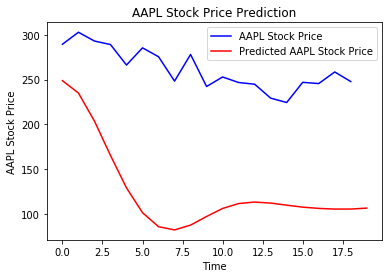

In [64]:
plt.plot(real_stock_price, color = 'blue', label = 'AAPL Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()

In [50]:
len(predicted_stock_price)

20